# Visualizations using Matplotib and seaborn

### About
Creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### Importing Data

In [16]:
df = pd.read_csv('historical_automobile_sales.csv')
df.head()

df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### Data Description

Data represents automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

### Data Analysis

#### How automobile sales fluctuate from year to year?

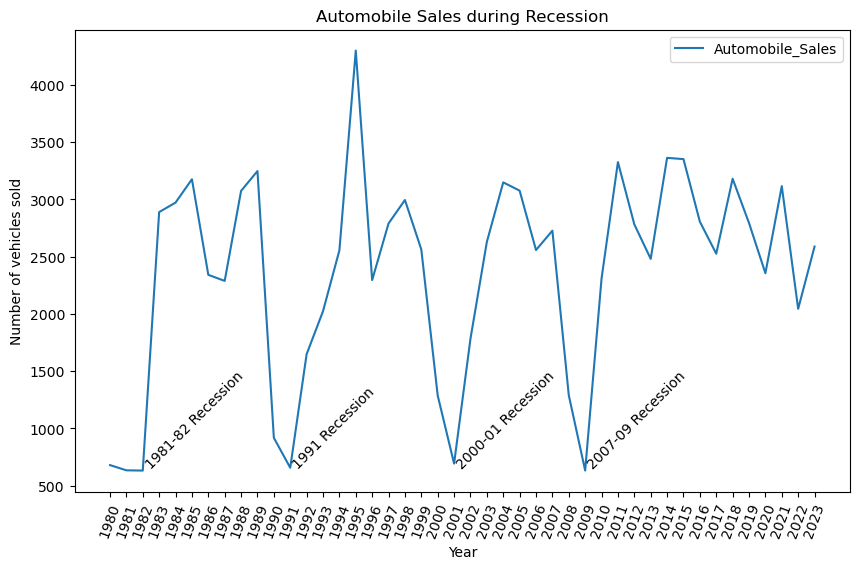

In [6]:
new_df = df.groupby(['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
new_df.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Number of vehicles sold')
plt.title('Automobile Sales during Recession')
plt.xticks(range(1980, 2024), rotation=70)
plt.text(1982, 650, '1981-82 Recession', rotation=45)
plt.text(1991, 650, '1991 Recession', rotation=45)
plt.text(2001, 650, '2000-01 Recession', rotation=45)
plt.text(2009, 650, '2007-09 Recession', rotation=45)
plt.legend()
plt.show()

#### Is there a noticeable difference in sales trends between different vehicle types during recession periods?

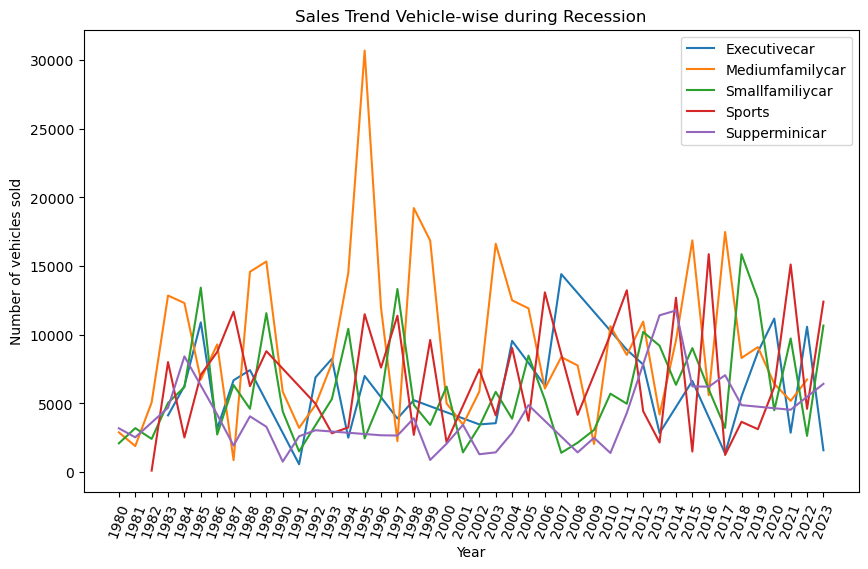

In [7]:
new_df = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
new_df.set_index('Year', inplace=True)
new_df = new_df.groupby(['Vehicle_Type'])['Automobile_Sales']
plt.figure(figsize=(10, 6))
new_df.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Number of vehicles sold')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.xticks(range(1980, 2024), rotation=70)
plt.legend()
plt.show()

#### During recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle while sales of the superminicar and smallfamilycar increased.

---

#### Comparing the sales trend per vehicle type for a recession period with a non-recession period.


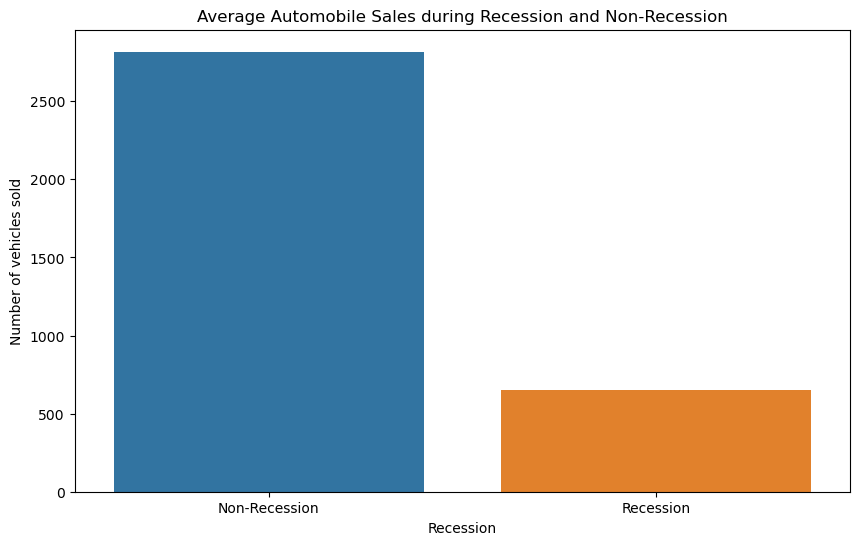

In [8]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Number of vehicles sold')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

#### Comparing the sales of different vehicle types during a recession and a non-recession period

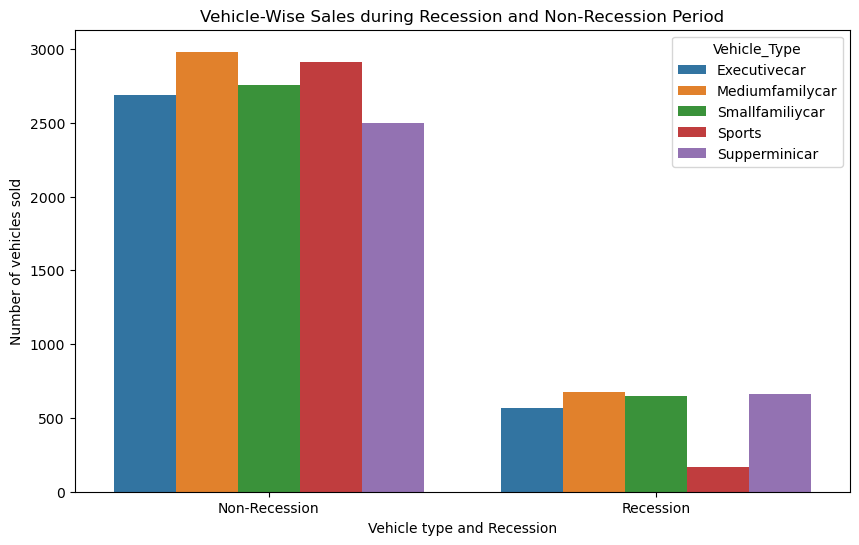

In [9]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Vehicle type and Recession')
plt.ylabel('Number of vehicles sold')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

#### From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession. <br> However, the most affected type of vehicle is executivecar and sports

---


#### How did the GDP vary over time during recession and non-recession periods? 

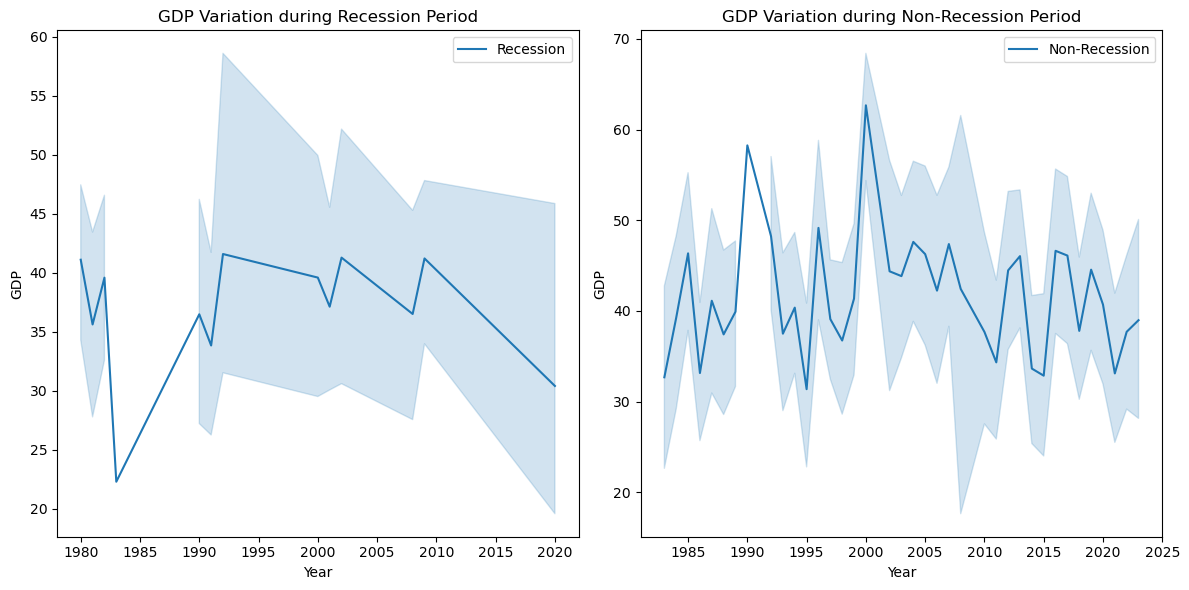

In [10]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]    
non_rec_data = df[df['Recession'] == 0]
    
#Figure
fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 
    
#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()

#### It is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company

---

#### How has seasonality impacted the sales, in which months the sales were high or low? 

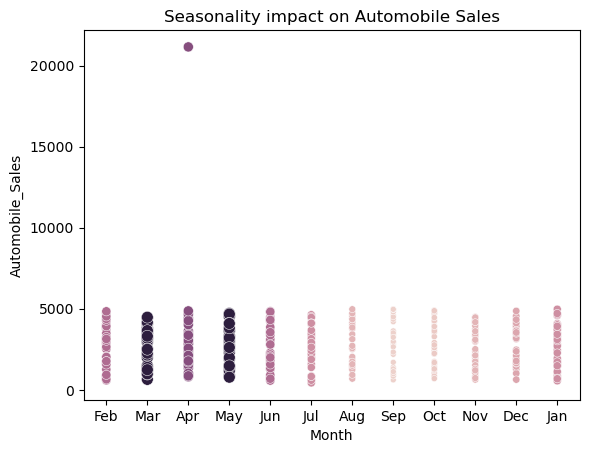

In [11]:
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight'] #for bubble effect
 
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

#### It is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April

---

#### Is there a correlation between consumer confidence and automobile sales during recession period?

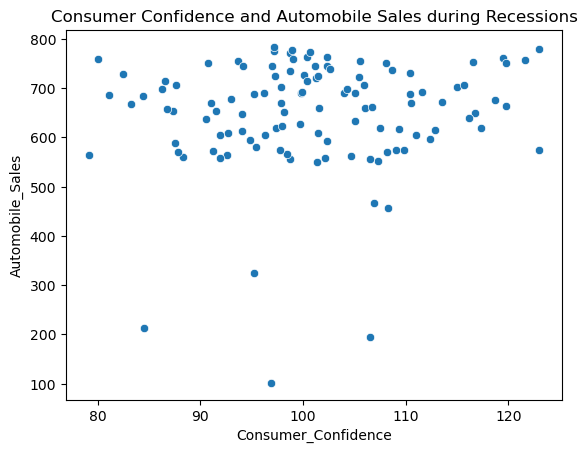

In [12]:
rec_data = df[df['Recession'] == 1]

sns.scatterplot(data=rec_data, x='Consumer_Confidence', y='Automobile_Sales')

plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()

#### ...and how does the average vehicle price relate to the sales volume during recessions?

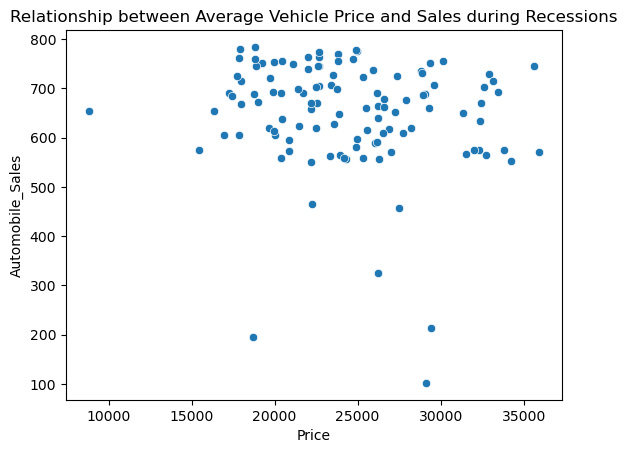

In [13]:
rec_data = df[df['Recession'] == 1]

sns.scatterplot(data=rec_data, x='Price', y='Automobile_Sales')

plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.show()

#### There is not much relation!

---

#### Displaying Advertising Expenditure during Recession and Non-Recession Periods

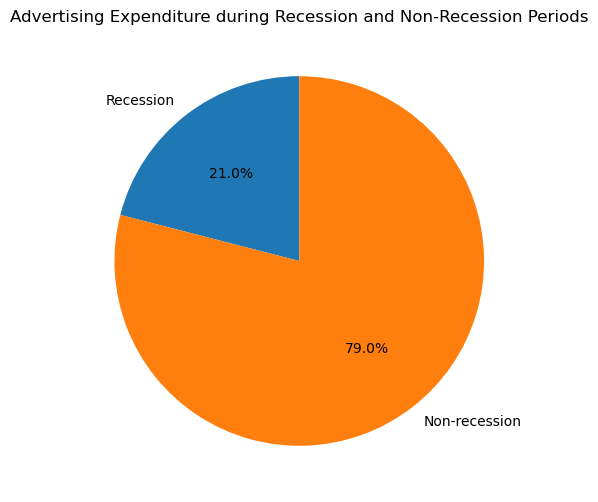

In [18]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
rec_sum = rec_data['Advertising_Expenditure'].sum()
non_rec_sum = non_rec_data['Advertising_Expenditure'].sum()
y = [rec_sum, non_rec_sum]
mylabels = ['Recession', 'Non-recession']

plt.figure(figsize=(8, 6))
plt.pie(y, labels = mylabels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show() 

#### It seems that the company has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

---

#### Displaying the total advertisement expenditure for each vehicle type

Text(0.5, 1.0, 'Share of Each Vehicle Type in Total Sales during Recessions')

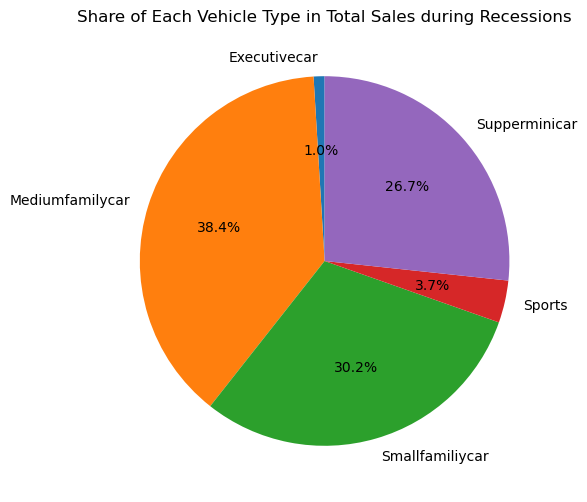

In [15]:
rec_data = df[df['Recession'] == 1]
rec_data = rec_data.groupby(['Vehicle_Type'])['Advertising_Expenditure'].sum()
y = rec_data.values
mylabels = rec_data.index

plt.figure(figsize=(8, 6))
plt.pie(y, labels = mylabels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

#plt.show() 

#### During recession the advertisements were mostly focued on low price range vehicle. A wise decision!